In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
##for dirname, _, filenames in os.walk('/kaggle/input'):
   ## for filename in filenames:
       ## print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
import itertools 
import re
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import numpy as np

In [10]:
train_dir = '/kaggle/input/dog-breed-identification-data/train'
test_dir ='/kaggle/input/dog-breed-identification-data/test'

In [11]:
def append_ext(fn):
    return fn+".jpg"
traindf = pd.read_csv('/kaggle/input/dog-breed-identification-data/labels.csv',dtype=str)
testdf = pd.read_csv('/kaggle/input/dog-breed-identification-data/sample_submission.csv',dtype=str)
traindf["id"] = traindf["id"].apply(append_ext)
testdf["id"] = testdf["id"].apply(append_ext)

In [12]:
traindf.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07.jpg       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97.jpg             dingo
2  001cdf01b096e06d78e9e5112d419397.jpg          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d.jpg          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62.jpg  golden_retriever

In [13]:
traindf.shape


(10222, 2)

In [14]:
testdf.head()

id        affenpinscher  \
0  000621fb3cbb32d8935728e48679680e.jpg  0.00833333333333333   
1  00102ee9d8eb90812350685311fe5890.jpg  0.00833333333333333   
2  0012a730dfa437f5f3613fb75efcd4ce.jpg  0.00833333333333333   
3  001510bc8570bbeee98c8d80c8a95ec1.jpg  0.00833333333333333   
4  001a5f3114548acdefa3d4da05474c2e.jpg  0.00833333333333333   

          afghan_hound  african_hunting_dog             airedale  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

  american_staffordshire_terrier          appenzeller   australian_terrier  \
0            0.00833333333333333  0.00833333333333333  0.00833333333333333   
1            0.00833333333333333  0.00833333333333333  0.00833333333333333   
2            0.00833333333333333  0.00833333333333333  0.00833333333333333   
3            0.00833333333333333  0.00833333333333333  0.00833333333333333   
4            0.00833333333333333  0.00833333333333333  0.00833333333333333   

               basenji               basset  ...           toy_poodle  \
0  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  ...  0.00833333333333333   

           toy_terrier               vizsla         walker_hound  \
0  0.00833333333333333  0.00833333333333333  0.00833333333333333   
1  0.00833333333333333  0.00833333333333333  0.00833333333333333   
2  0.00833333333333333  0.00833333333333333  0.00833333333333333   
3  0.00833333333333333  0.00833333333333333  0.00833333333333333   
4  0.00833333333333333  0.00833333333333333  0.00833333333333333   

            weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0  0.00833333333333333    0.00833333333333333         0.00833333333333333   
1  0.00833333333333333    0.00833333333333333         0.00833333333333333   
2  0.00833333333333333    0.00833333333333333         0.00833333333333333   
3  0.00833333333333333    0.00833333333333333         0.00833333333333333   
4  0.00833333333333333    0.00833333333333333         0.00833333333333333   

               whippet wire-haired_fox_terrier    yorkshire_terrier  
0  0.00833333333333333     0.00833333333333333  0.00833333333333333  
1  0.00833333333333333     0.00833333333333333  0.00833333333333333  
2  0.00833333333333333     0.00833333333333333  0.00833333333333333  
3  0.00833333333333333     0.00833333333333333  0.00833333333333333  
4  0.00833333333333333     0.00833333333333333  0.00833333333333333  

[5 rows x 121 columns]

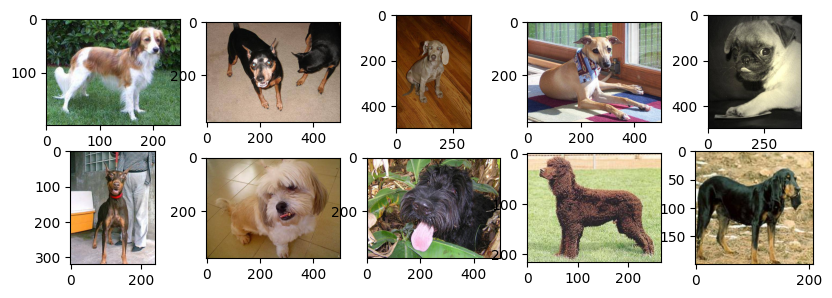

In [15]:
path = "/kaggle/input/dog-breed-identification-data/train"
sub_class = os.listdir(path)

fig = plt.figure(figsize=(10,5))
for e in range(len(sub_class[:10])):
    plt.subplot(3,5,e+1)
    img = plt.imread(os.path.join(path,sub_class[e]))
    plt.imshow(img, cmap=plt.get_cmap('gray'))


In [16]:
train_datagen=ImageDataGenerator( rescale=1./255.,
                                  #rotation_range = 20,
                                  #brightness_range=[0.2,1.0],
                                  #width_shift_range = 0.2,
                                  #height_shift_range = 0.2,
                                  #shear_range = 0.2,
                                  #zoom_range = [0.7,1],
                                  horizontal_flip = True,
                                  #Setting validation split to 2% 
                                  validation_split=0.1 
                                  )

In [17]:
BATCH_SIZE = 32
image_size=(299,299)

train_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="training",
batch_size=BATCH_SIZE,
seed=30,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb" 
)

Found 9200 validated image filenames belonging to 120 classes.


In [18]:
x,y = next(train_generator)
print(type(x))
print(x.shape)
print(y.shape)


<class 'numpy.ndarray'>
(32, 299, 299, 3)
(32, 120)


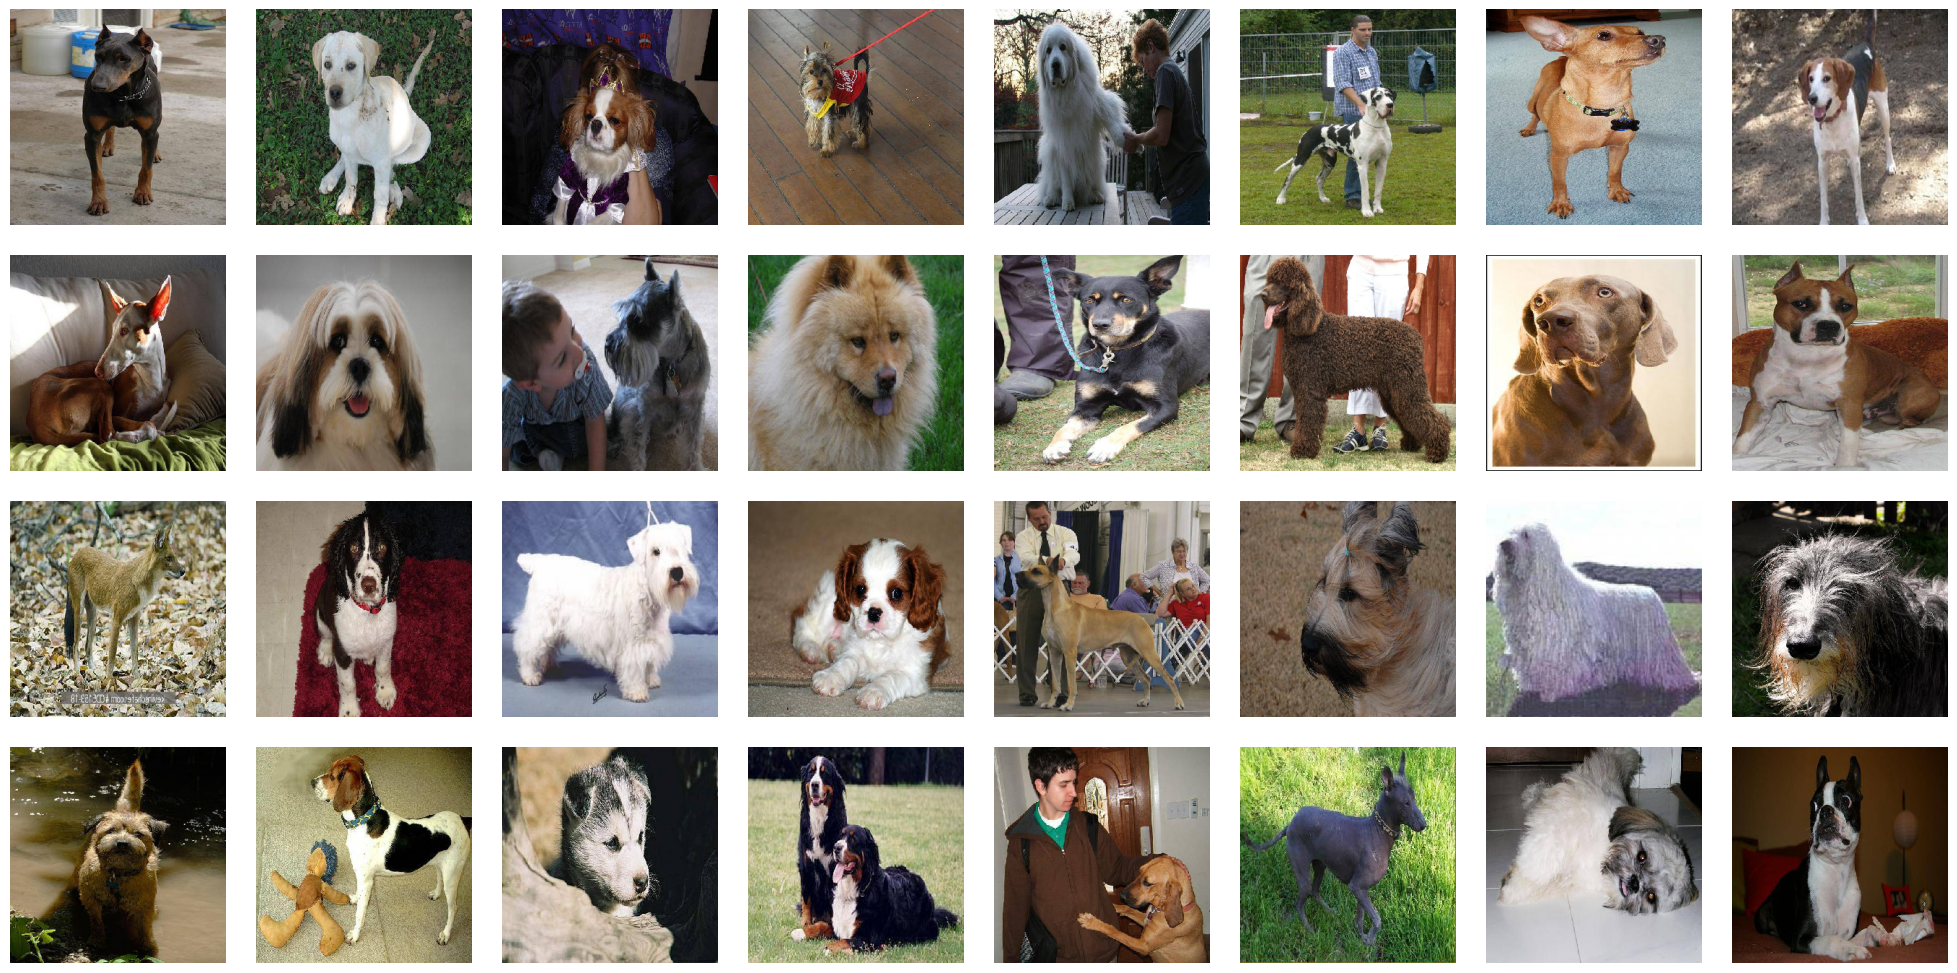

In [20]:


def show_grid(image_list,nrows,ncols,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        

        show_grid(x,4,8,figsize=(25,25))




In [21]:


valid_generator=train_datagen.flow_from_dataframe(
dataframe=traindf,
directory=train_dir,
x_col="id",
y_col="breed",
subset="validation",
batch_size=BATCH_SIZE,
seed=30,
shuffle=True,
class_mode="categorical",
target_size=image_size,
color_mode="rgb")



Found 1022 validated image filenames belonging to 120 classes.


In [22]:
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=testdf,
directory=test_dir,
x_col="id",
y_col=None,
batch_size=BATCH_SIZE,
seed=30,
shuffle=False,
class_mode=None,
target_size=image_size,
color_mode="rgb")

Found 10357 validated image filenames.


In [24]:
shape=[299,299,3]

base_model = tf.keras.applications.InceptionV3(
        weights='imagenet',
        include_top=False ,
        input_shape=shape
    )
base_model.trainable = False
    
model = tf.keras.Sequential([ 
        base_model,   
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(120, activation='softmax')
    ])



In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
opt=tf.keras.optimizers.SGD(lr=1e-3, momentum=0.9)
model.compile(optimizer = opt ,
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 120)               30840     
                                                                 
Total params: 22358168 (85.29 MB)
Trainable params: 555384 (2.12 MB)
Non-trainable params: 21802784 (83.17 MB)
_________

In [26]:
reduce = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',factor=0.2,patience=5, min_lr=0.001 )

early = tf.keras.callbacks.EarlyStopping( patience=2,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [28]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10,
                    callbacks=[early],)

model.save('/kaggle/working/inceptionv3_finetuned.h5')


Epoch 1/10
287/287 [==============================] - 71s 245ms/step - loss: 0.7079 - accuracy: 0.8087 - val_loss: 0.4542 - val_accuracy: 0.8700
Epoch 2/10
287/287 [==============================] - 52s 181ms/step - loss: 0.5352 - accuracy: 0.8412 - val_loss: 0.4011 - val_accuracy: 0.8800
Epoch 3/10
287/287 [==============================] - 49s 170ms/step - loss: 0.4671 - accuracy: 0.8550 - val_loss: 0.4219 - val_accuracy: 0.8690
Epoch 4/10
287/287 [==============================] - 53s 183ms/step - loss: 0.4017 - accuracy: 0.8733 - val_loss: 0.3577 - val_accuracy: 0.8901
Epoch 5/10
287/287 [==============================] - 52s 182ms/step - loss: 0.3774 - accuracy: 0.8830 - val_loss: 0.3806 - val_accuracy: 0.8790
Epoch 6/10
287/287 [==============================] - 53s 184ms/step - loss: 0.3354 - accuracy: 0.8928 - val_loss: 0.3851 - val_accuracy: 0.8841


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/inceptionv3_finetuned.pickle'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])

/kaggle/working/inceptionv3_finetuned.pickle

In [30]:
import pickle

# Save the model
with open('/kaggle/working/inceptionv3_finetuned.pickle', 'wb') as file:
    pickle.dump(model, file)



/tmp/ipykernel_34/494254271.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


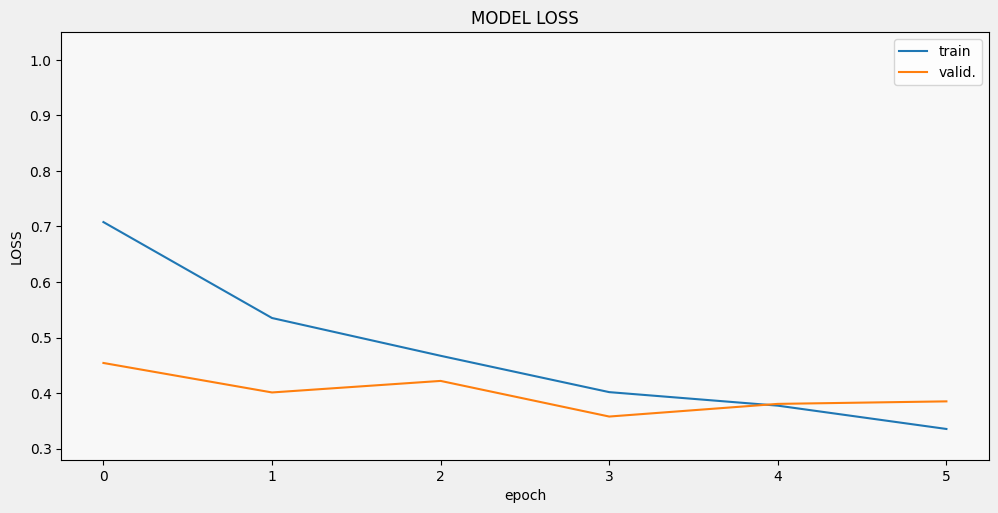

In [32]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])


display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)


/tmp/ipykernel_34/494254271.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


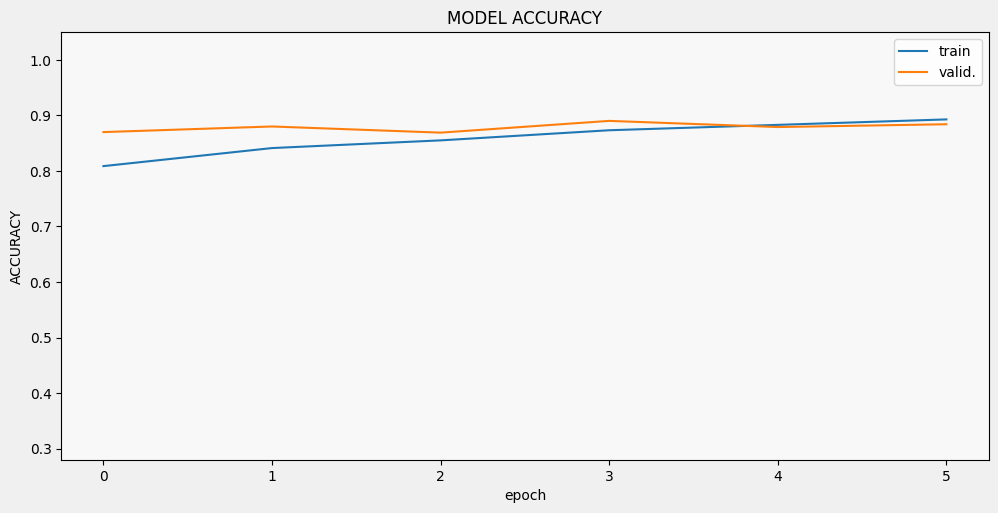

In [33]:

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    211,
)




In [35]:
pred=model.predict(test_generator)

324/324 [==============================] - 111s 340ms/step


In [36]:
df_submission = pd.read_csv('/kaggle/input/dog-breed-identification-data/sample_submission.csv')
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
1            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
2            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
3            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
4            0.008333  0.008333  0.008333  ...    0.008333     0.008333   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.008333      0.008333    0.008333                0.008333   
1  0.008333      0.008333    0.008333                0.008333   
2  0.008333      0.008333    0.008333                0.008333   
3  0.008333      0.008333    0.008333                0.008333   
4  0.008333      0.008333    0.008333                0.008333   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.008333  0.008333                 0.008333   
1                     0.008333  0.008333                 0.008333   
2                     0.008333  0.008333                 0.008333   
3                     0.008333  0.008333                 0.008333   
4                     0.008333  0.008333                 0.008333   

   yorkshire_terrier  
0           0.008333  
1           0.008333  
2           0.008333  
3           0.008333  
4           0.008333  

[5 rows x 121 columns]

In [39]:
file_list = test_generator.filenames
id_list = []
for name in file_list:
    m = re.sub('test/', '', name)
    m = re.sub('.jpg', '', m)
    id_list.append(m)

In [38]:
df_submission['id'] = id_list
df_submission.iloc[:,1:] = pred
df_submission.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e   6.633176e-07  5.539072e-07   
1  00102ee9d8eb90812350685311fe5890   5.531424e-07  3.293270e-07   
2  0012a730dfa437f5f3613fb75efcd4ce   2.449933e-05  1.849698e-03   
3  001510bc8570bbeee98c8d80c8a95ec1   1.540361e-05  1.650698e-05   
4  001a5f3114548acdefa3d4da05474c2e   7.571723e-03  1.733393e-05   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         4.484049e-08  2.526644e-07                    1.337650e-08   
1         2.131371e-07  1.534685e-06                    1.729063e-05   
2         3.913802e-05  2.543624e-05                    1.137801e-05   
3         6.038849e-07  1.074955e-06                    5.587084e-05   
4         2.012443e-05  3.022842e-07                    8.589513e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  6.930106e-08        1.002003e-08  4.203147e-07  1.779408e-08  ...   
1  1.460389e-05        1.183968e-06  2.053430e-06  2.555459e-06  ...   
2  3.524121e-05        1.761667e-06  3.416968e-06  2.444801e-05  ...   
3  1.408780e-05        3.046730e-06  7.019722e-06  1.514657e-05  ...   
4  1.070581e-05        2.038714e-06  1.028693e-05  9.450961e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.241554e-07  3.819578e-07  2.466550e-07  8.528404e-08  8.608698e-08   
1  1.215847e-06  2.330207e-06  8.750628e-07  4.546115e-06  8.146065e-07   
2  8.663097e-06  4.288072e-05  6.647505e-06  2.160098e-04  3.472894e-05   
3  2.333087e-05  5.627809e-06  1.447636e-06  1.248451e-04  1.016847e-06   
4  4.958986e-05  2.879296e-05  8.174836e-06  1.811725e-05  5.200898e-06   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            9.824917e-08                 2.334941e-07  2.328629e-08   
1            1.231330e-06                 4.570194e-04  1.589753e-06   
2            4.119162e-04                 1.157643e-05  9.517786e-05   
3            9.368735e-06                 9.240077e-07  3.123348e-06   
4            8.304133e-06                 7.882413e-06  2.418365e-06   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.180484e-06       2.958849e-07  
1             9.410176e-07       1.825454e-06  
2             3.524531e-05       1.838853e-05  
3             4.875367e-07       4.994150e-05  
4             4.468243e-05       5.761523e-04  

[5 rows x 121 columns]

In [40]:
final_sub = df_submission.set_index('id')
final_sub.to_csv('Submission.csv')

In [ ]:
from IPython.display import FileLink

# Replace 'my_trained_model.h5' with your actual model file name
output_path = r'/kaggle/working/Submission.csv'

# Create a download link
FileLink(r'./' + output_path.split('/')[-1])